# Confeccion de la red en NetworkX

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

## Leeremos desde el archvio para crear la red

In [10]:
    

# Especifica la ruta de tu archivo TSV
ruta_archivo = 'red_fenotipos_genes_dysgrentero.txt'

# Lee el archivo TSV y crea un grafo bipartito
    
df = pd.read_csv(ruta_archivo, sep='\t')

# Crea un grafo bipartito
G = nx.Graph()

# Agregar nodos y aristas al grafo bipartito
for _, row in df.iterrows():
    gene_symbol = row['gene_symbol']
    hpo_id = row['hpo_id']
    G.add_node(gene_symbol, bipartite=0)  # genes en la primera partición
    G.add_node(hpo_id, bipartite=1)       # HPO IDs en la segunda partición
    G.add_edge(gene_symbol, hpo_id)

    


In [7]:
nx.draw(G, pos, with_labels=True, node_size=10, font_size=8)
plt.show()

### Obtenemos la proyeccion de la red bipartita en la partición de fenotipos (HPO IDs)

In [12]:
hpo_projection = nx.bipartite.projected_graph(G, set(df['hpo_id']))

In [ ]:
pos = nx.spring_layout(hpo_projection)
nx.draw(hpo_projection, pos, with_labels=True, node_size=10, font_size=8)
plt.show()


## Crearemos una red con aquellos genes con menos interacciones
Ademas, filtraremos la distancia en nodos a 4 pasos desde el HP:0010526 (dysgraphia)

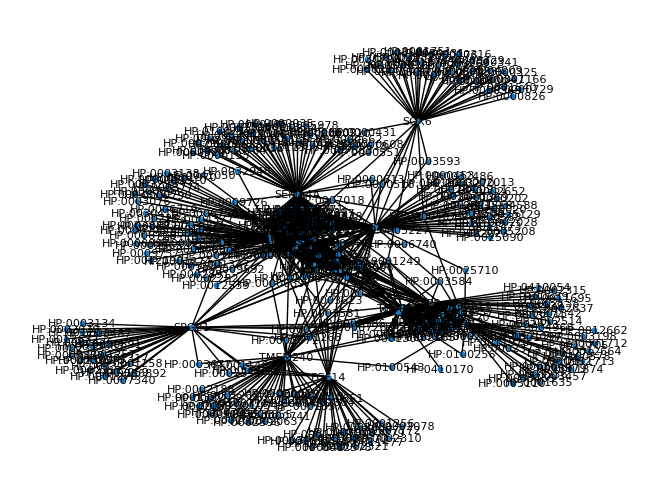

In [30]:


# Lee el archivo TSV y crea un grafo bipartito
df = pd.read_csv(ruta_archivo, sep='\t')

# Crea un grafo bipartito
G = nx.Graph()
## lista de genes con menor activiadad en nuestro grafo
lista_genes = """
SORL1        26
TOMM40       26
ABCA7        37
SOX6         39
SPG21        45
FGF14        49
TMEM240      50
PMS1         53
PSEN2        60
MLH3         63
PMS2         64
FAN1         64
MSH6         83
MSH2         84
APP          85
EPCAM        94
SEMA4A       99
"""

# Crear una lista de gene id
gene_ids = [line.split()[0] for line in lista_genes.split('\n') if line]


# Agregar nodos y aristas al grafo bipartito
for _, row in df.iterrows():
    if(row['gene_symbol'] in gene_ids):
        gene_symbol = row['gene_symbol']
        hpo_id = row['hpo_id']

        G.add_node(gene_symbol, bipartite=0)  # genes en la primera partición
        G.add_node(hpo_id, bipartite=1)       # HPO IDs en la segunda partición
        G.add_edge(gene_symbol, hpo_id)

# Nodo de interés
target_hpo = 'HP:0010526'

# Calcular las longitudes de los caminos más cortos desde el nodo de interés
shortest_paths = nx.single_source_shortest_path_length(G, target_hpo)

# Filtrar nodos a 4 pasos o menos 
filtered_nodes = [node for node, distance in shortest_paths.items() if distance <= 4]

# Crear un subgrafo con los nodos filtrados
subgraph = G.subgraph(filtered_nodes)

# Visualizar el subgrafo
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_size=10, font_size=5, linewidths=0.1)

plt.savefig('grafo_bipartito.png', dpi=3000)
plt.show()



Ahora, bajaremos el numero de pasos a 2

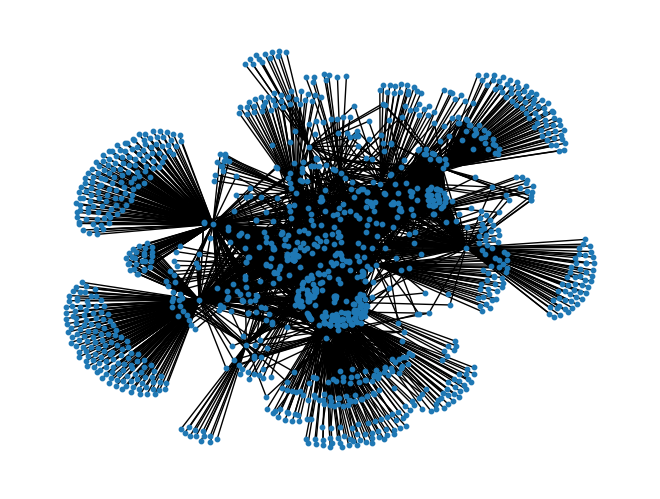

In [20]:
# Calcular las longitudes de los caminos más cortos desde el nodo de interés
shortest_paths = nx.single_source_shortest_path_length(G, target_hpo)

# Filtrar nodos a 4 pasos o menos 
filtered_nodes2 = [node for node, distance in shortest_paths.items() if distance <= 2]

# Crear un subgrafo con los nodos filtrados
subgraph2 = G.subgraph(filtered_nodes2)

# Visualizar el subgrafo
pos2 = nx.spring_layout(subgraph2)
nx.draw(subgraph2, pos2, with_labels=True, node_size=10, font_size=8)
plt.savefig('grafo_bipartito.png', dpi=300)
plt.show()